In [1888]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading 

In [1889]:
data = pd.read_csv('data.csv')
data.head(4)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649


In [1890]:
# pd.set_option('display.max_columns',None) #to display all columns
# pd.set_option('display.max_rows',None) #to display all rows

## Data Cleaning
Checking dataset information

In [1891]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


Checking null values in dataset


In [1892]:
data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

Checking duplicate values in dataset

In [1893]:
data.duplicated().sum()

0

Removing extra column from dataset - 'Unnamed: 0'


In [1894]:
data = data.drop('Unnamed: 0',axis=1)
data.head(4)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649


In [1895]:
# Remove commas
#data['Prize'] = data['Prize'].str.replace(',', '')

# Convert to numeric (coerce invalid values to NaN)
#data['Prize'] = data['Prize'].astype(float)



data['Prize'] = pd.to_numeric(data['Prize'], errors='coerce')
data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [1896]:
data.shape

(541, 11)

## Feature Extraction

Extracting features from categorical features

In [1897]:
cat_feature = data.select_dtypes(include='object').columns
data[cat_feature].head(2)

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1


"Model" feature is containing branch of mobile. extracting the branch from model feature

In [1898]:
#Extracting brand
data[['Brand','Model']] = data['Model'].str.split(" ",n=1,expand=True)
data['Brand'] = data['Brand'].replace('I','I-Kall')
data['Brand'] = data['Brand'].str.capitalize()
data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Brand
0,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix
1,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix
2,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999,Motorola
3,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649,Poco
4,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999,Infinix


In [1899]:
data['Brand'].unique()

array(['Infinix', 'Motorola', 'Poco', 'Redmi', 'Samsung', 'Vivo',
       'Realme', 'Micromax', 'Google', 'Micromax1', 'Oppo', 'Tecno',
       'Nothing', 'I-kall', 'Itel', 'Oneplus', 'Iqoo', 'Nokia', 'Apple',
       'Lava'], dtype=object)

Categorizing the mobile brand as other which have few data <5

In [1900]:
brand_count = data['Brand'].value_counts()
brand_count = brand_count[brand_count<5]
brand_count.index
data['Brand'] = data['Brand'].replace(brand_count.index,'Other')
data['Brand'].value_counts()

Brand
Realme      98
Redmi       75
Infinix     65
Vivo        62
Poco        60
Samsung     55
Motorola    46
Tecno       17
Oppo        16
Other       15
Micromax    13
Google       9
Oneplus      5
Apple        5
Name: count, dtype: int64

Grouping count and average price of "Models" basis "Brand"

In [1901]:

grouped_data1 = data.groupby(['Brand', 'Model']).agg({'Prize': ['mean', 'count']})
grpdata = pd.DataFrame(grouped_data1)
grpdata

Prize      
                               mean count
Brand  Model                             
Apple  iPhone 11       41199.000000     1
       iPhone 12       53999.000000     1
       iPhone 14 Plus  80999.000000     3
Google Pixel 6a        29665.666667     3
       Pixel 7         55999.000000     3
...                             ...   ...
Vivo   Y33s            16990.000000     1
       Y35             16999.000000     2
       Y56 5G          18999.000000     4
       Y565G           19979.000000     1
       Y75             18489.000000     2

[184 rows x 2 columns]

Extracting only numeric digit from column "Rear Camera" and "Front Camera" 

In [1902]:
import pandas as pd

# Convert the 'Rear Camera' list to a pandas Series
# data['Rear Camera'] = pd.Series(data['Rear Camera'])
# data['Front Camera'] = pd.Series(data['Front Camera'])

# Extract only digits (all digits concatenated together) in new column
data['Rear Camera MP'] = data['Rear Camera'].str.extract(r'(\d+)').astype(int)
data['Front Camera MP'] = data['Front Camera'].str.extract(r'(\d+)').astype(int)

data = data.drop(columns=['Front Camera','Rear Camera'])

data.head()


,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Prize,Brand,Rear Camera MP,Front Camera MP
0,SMART 7,Night Black,64,4,6000,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix,13,5
1,SMART 7,Azure Blue,64,4,6000,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix,13,5
2,G32,Mineral Gray,128,8,5000,0,16.64,Qualcomm Snapdragon 680,11999,Motorola,50,16
3,C50,Royal Blue,32,2,5000,0,16.56,Mediatek Helio A22,5649,Poco,8,5
4,HOT 30i,Marigold,128,8,5000,1,16.76,G37,8999,Infinix,50,5


Extracting the processor brand from processor column 

In [1903]:
# Convert the 'Processor_' column to string before splitting
data['Processor_'] = data['Processor_'].astype(str)
data['Processor_Brand'] = data['Processor_'].str.split(" ", n=1).str[0].str.capitalize()

data = data.drop(['Processor_','Colour'],axis=1)
data.head()

,Model,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Brand,Rear Camera MP,Front Camera MP,Processor_Brand
0,SMART 7,64,4,6000,1,16.76,7299,Infinix,13,5,Unisoc
1,SMART 7,64,4,6000,1,16.76,7299,Infinix,13,5,Unisoc
2,G32,128,8,5000,0,16.64,11999,Motorola,50,16,Qualcomm
3,C50,32,2,5000,0,16.56,5649,Poco,8,5,Mediatek
4,HOT 30i,128,8,5000,1,16.76,8999,Infinix,50,5,G37


Categorizing the processor brand as other which have few data <5

In [1904]:
brand_count = data['Processor_Brand'].value_counts()
brand_count = brand_count[brand_count<4]
brand_count.index
data['Processor_Brand'] = data['Processor_Brand'].replace(brand_count.index,'Other')
data['Processor_Brand'].value_counts()


Processor_Brand
Mediatek      215
Qualcomm      116
Unisoc         55
Dimensity      28
Helio          27
Other          21
Exynos         18
Snapdragon     13
Sec             9
G37             8
Sc6531e         7
Spreadtrum      6
Google          5
Octa            5
Meditek         4
Ios             4
Name: count, dtype: int64

In [1905]:
data.head()

,Model,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Brand,Rear Camera MP,Front Camera MP,Processor_Brand
0,SMART 7,64,4,6000,1,16.76,7299,Infinix,13,5,Unisoc
1,SMART 7,64,4,6000,1,16.76,7299,Infinix,13,5,Unisoc
2,G32,128,8,5000,0,16.64,11999,Motorola,50,16,Qualcomm
3,C50,32,2,5000,0,16.56,5649,Poco,8,5,Mediatek
4,HOT 30i,128,8,5000,1,16.76,8999,Infinix,50,5,G37


Visualizing range of price basis of Mobile Brand 

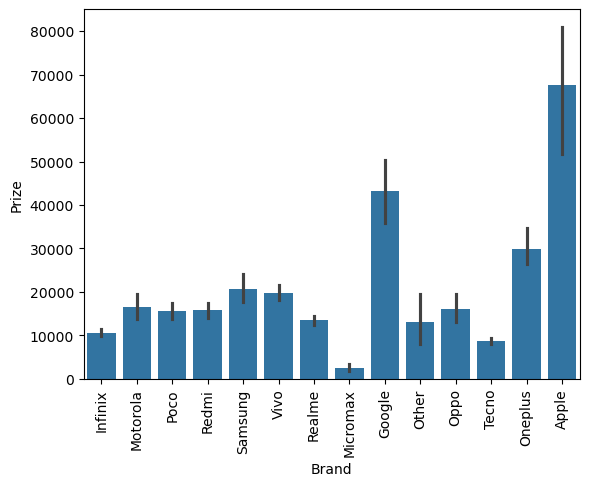

In [1906]:
sns.barplot(data=data,x='Brand',y="Prize")
plt.xticks(rotation=90)
plt.show()

Detecting Outliers


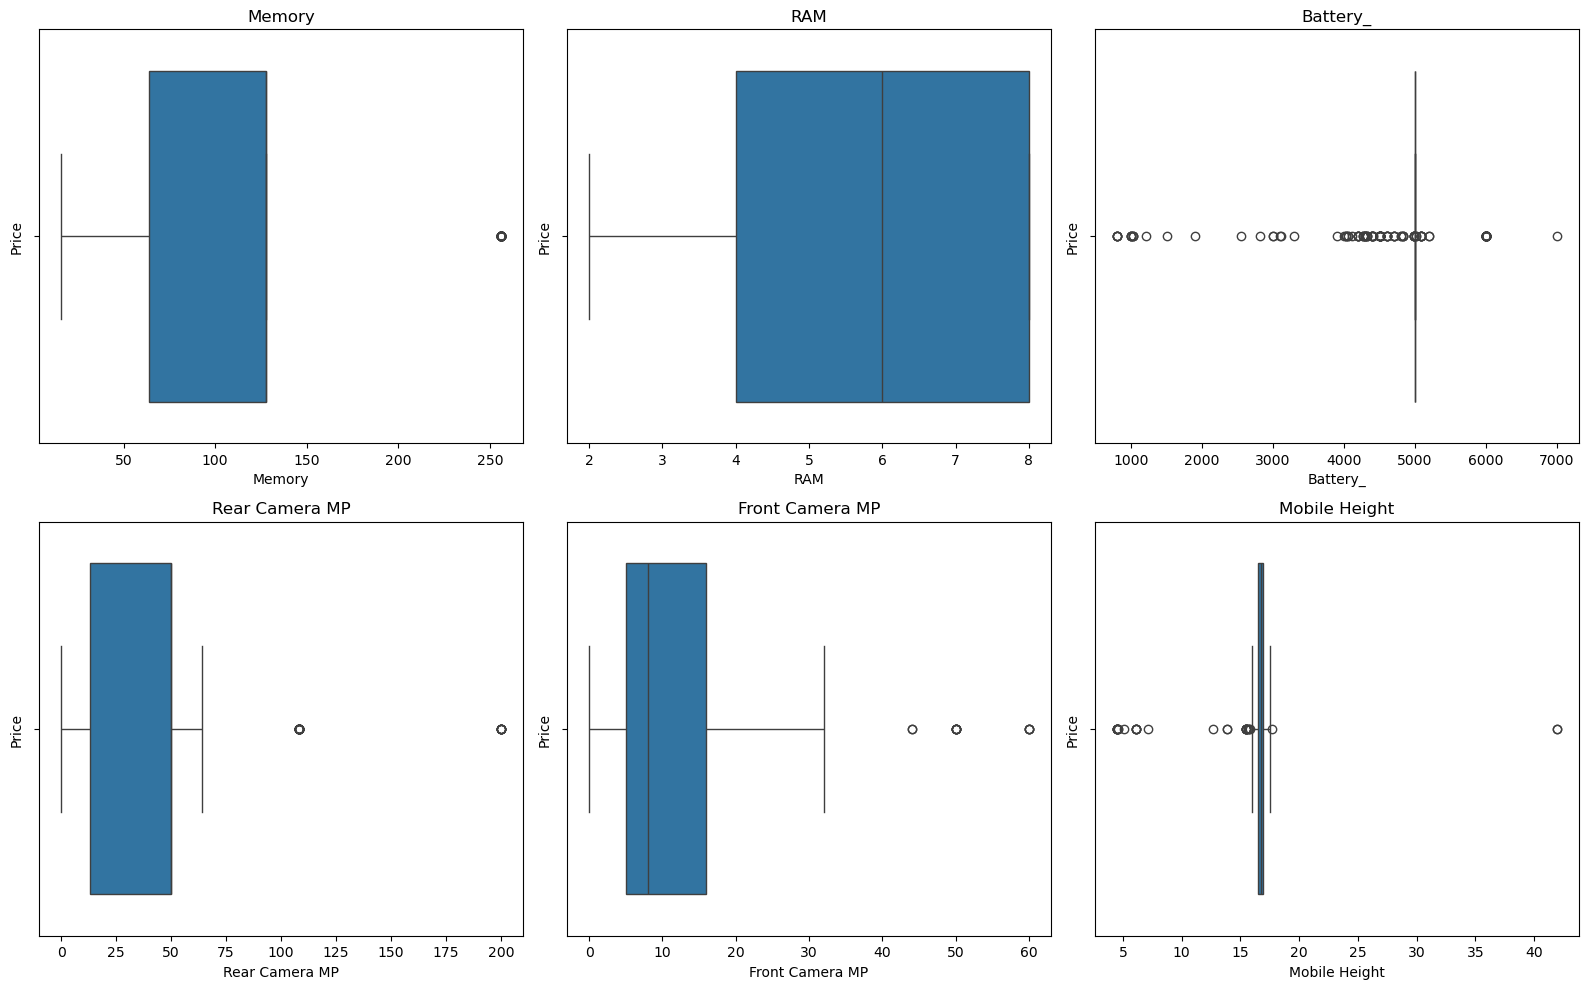

In [1907]:
#Detecting outliers
features = ['Memory', 'RAM', 'Battery_', 'Rear Camera MP', 'Front Camera MP', 'Mobile Height']

plt.figure(figsize=(16, 10)) 

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'{feature}' )
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

We are not removing outliers here since price of mobile may vary acoording to the feature 

In [1908]:

data1 = data.copy()

# for col in features:
#     Q1 = data1[col].quantile(0.25)
#     Q3 = data1[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     data1 = data1[~((data1[col] < lower_bound) | (data1[col] > upper_bound))]
    

Visualising the discribution of price 

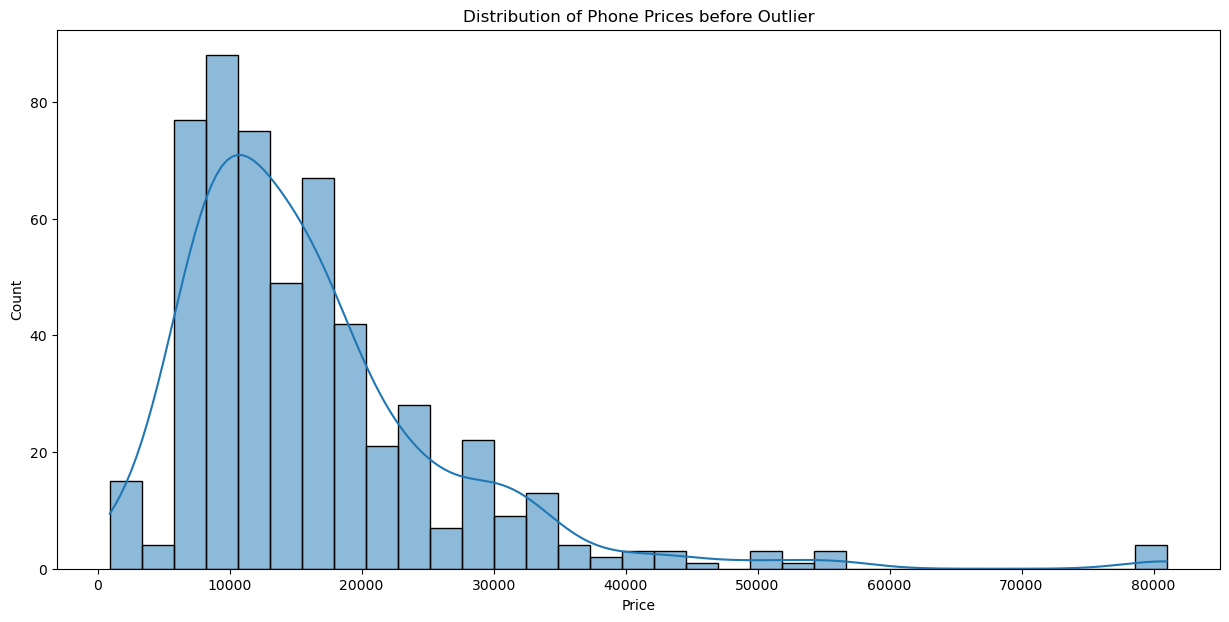

In [1909]:

plt.figure(figsize=(15,7))
sns.histplot(x=data['Prize'], kde=True)
plt.title('Distribution of Phone Prices before Outlier')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Checking the correlation

In [1910]:
num_feat = data1.select_dtypes(exclude='object').columns
data[num_feat].corr()['Prize'].sort_values(ascending=False)

Prize              1.000000
Memory             0.566660
Front Camera MP    0.532321
RAM                0.532024
Rear Camera MP     0.410367
Mobile Height      0.176009
Battery_          -0.034297
AI Lens           -0.153691
Name: Prize, dtype: float64

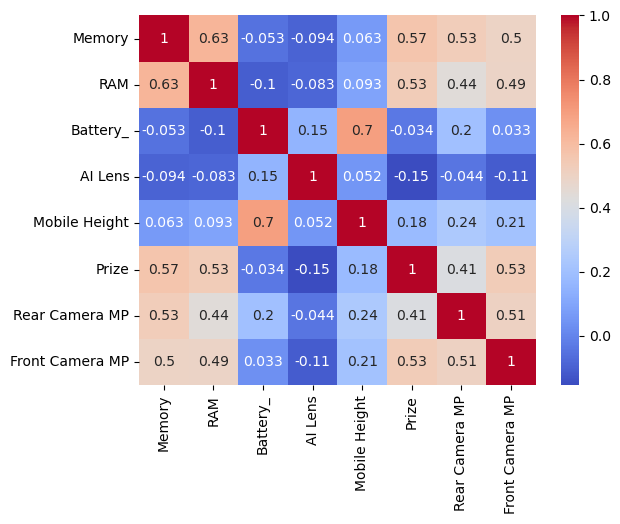

In [1911]:
df_Corr = data1[num_feat]
sns.heatmap(df_Corr.corr(), annot= True, cmap= 'coolwarm')
plt.show()

Checking and removing the duplicate data

In [1912]:
data1[data.duplicated()]

,Model,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Brand,Rear Camera MP,Front Camera MP,Processor_Brand
1,SMART 7,64,4,6000,1,16.76,7299,Infinix,13,5,Unisoc
5,HOT 30i,128,8,5000,1,16.76,8999,Infinix,50,5,G37
6,HOT 30i,128,8,5000,1,16.76,8999,Infinix,50,5,G37
7,HOT 30i,128,8,5000,1,16.76,8999,Infinix,50,5,G37
9,HOT 30i,64,4,5000,1,16.76,7999,Infinix,50,5,G37
...,...,...,...,...,...,...,...,...,...,...,...
515,Galaxy A54 5G,256,8,5000,0,16.26,40999,Samsung,50,32,Exynos
524,9 5G,64,4,5000,0,16.51,13499,Realme,48,16,Mediatek
526,Y100 5G,128,8,4500,0,16.21,23999,Vivo,64,16,Mediatek
527,Y100 5G,128,8,4500,0,16.21,23999,Vivo,64,16,Mediatek


In [1913]:
data1.drop_duplicates()

,Model,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Brand,Rear Camera MP,Front Camera MP,Processor_Brand
0,SMART 7,64,4,6000,1,16.76,7299,Infinix,13,5,Unisoc
2,G32,128,8,5000,0,16.64,11999,Motorola,50,16,Qualcomm
3,C50,32,2,5000,0,16.56,5649,Poco,8,5,Mediatek
4,HOT 30i,128,8,5000,1,16.76,8999,Infinix,50,5,G37
8,HOT 30i,64,4,5000,1,16.76,7999,Infinix,50,5,G37
...,...,...,...,...,...,...,...,...,...,...,...
536,Galaxy S23 5G,256,8,3900,0,15.49,79999,Samsung,50,12,Qualcomm
537,Z21,32,2,3100,0,12.70,5998,Other,5,2,Octa
538,Spark 8T,64,4,5000,0,16.76,9990,Tecno,50,8,Mediatek
539,Galaxy A54 5G,128,8,5000,0,16.26,38999,Samsung,50,32,Exynos


Label Encoding

In [1914]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
col = ['Model']
for encode in col:
    data1[encode]= LE.fit_transform(data1[encode])

One Hot encoding for important feature like mobile brand and processor branch which we get from feature extraction

In [1915]:
data1 = pd.get_dummies(data1, columns=['Brand','Processor_Brand'], drop_first=False)
data1.head()

,Model,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Rear Camera MP,Front Camera MP,Brand_Apple,...,Processor_Brand_Mediatek,Processor_Brand_Meditek,Processor_Brand_Octa,Processor_Brand_Other,Processor_Brand_Qualcomm,Processor_Brand_Sc6531e,Processor_Brand_Sec,Processor_Brand_Snapdragon,Processor_Brand_Spreadtrum,Processor_Brand_Unisoc
0,119,64,4,6000,1,16.76,7299,13,5,False,...,False,False,False,False,False,False,False,False,False,True
1,119,64,4,6000,1,16.76,7299,13,5,False,...,False,False,False,False,False,False,False,False,False,True
2,49,128,8,5000,0,16.64,11999,50,16,False,...,False,False,False,False,True,False,False,False,False,False
3,37,32,2,5000,0,16.56,5649,8,5,False,...,True,False,False,False,False,False,False,False,False,False
4,73,128,8,5000,1,16.76,8999,50,5,False,...,False,False,False,False,False,False,False,False,False,False


In [1916]:
cat_bool = data1.select_dtypes(include='bool').columns
data1[cat_bool] = data1[cat_bool].astype('int64')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model                       541 non-null    int32  
 1   Memory                      541 non-null    int64  
 2   RAM                         541 non-null    int64  
 3   Battery_                    541 non-null    int64  
 4   AI Lens                     541 non-null    int64  
 5   Mobile Height               541 non-null    float64
 6   Prize                       541 non-null    int64  
 7   Rear Camera MP              541 non-null    int32  
 8   Front Camera MP             541 non-null    int32  
 9   Brand_Apple                 541 non-null    int64  
 10  Brand_Google                541 non-null    int64  
 11  Brand_Infinix               541 non-null    int64  
 12  Brand_Micromax              541 non-null    int64  
 13  Brand_Motorola              541 non

Train Test Split 


In [1917]:
X = data1.drop(['Prize'],axis=1)
y = data1['Prize']

In [1918]:
# from sklearn.preprocessing import StandardScaler
# S_scale = StandardScaler()
# scale_X = S_scale.fit_transform(X)

In [1919]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(scale_X,y,test_size=0.25, random_state=42)

In [1920]:

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [1921]:

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()


In [1922]:
models = {"a":["LinearRegression",lr],
          "b":["DecisionTreeRegressor",dtr],
          "c":["GradientBoostingRegressor",gbr],
          "d":["RandomForestRegressor",rfr],
          }    # Create a dictionary to store the results

In [1923]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer,r2_score

def test_model(model, X_train=X_train,y_train=y_train):
    cv = KFold(n_splits=7, random_state=45, shuffle=True)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [1924]:
models_score=[]
for model in models:
    print("Model Name: ",models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of Model:",score)
    print("-----------------------")
    models_score.append([models[model][0],score])

Model Name:  LinearRegression
Score of Model: [0.6372596784429654]
-----------------------
Model Name:  DecisionTreeRegressor
Score of Model: [0.768253134268487]
-----------------------
Model Name:  GradientBoostingRegressor
Score of Model: [0.9224592547954701]
-----------------------
Model Name:  RandomForestRegressor
Score of Model: [0.8900739572228809]
-----------------------


In [1925]:
models_score

[['LinearRegression', [0.6372596784429654]],
 ['DecisionTreeRegressor', [0.768253134268487]],
 ['GradientBoostingRegressor', [0.9224592547954701]],
 ['RandomForestRegressor', [0.8900739572228809]]]

GradientBoostingRegressor model achived the highest score indicating that most effective model. Now train the model and hyperparameter tuning 

In [1926]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model with hyperparameters
gb_model = GradientBoostingRegressor(
    n_estimators=300,       # Number of boosting stages
    #learning_rate=0.1,      # Step size shrinkage
    learning_rate=0.2,
    max_depth=4,
    
    #max_depth=3,            # Maximum depth of individual estimators
    random_state=42         # Reproducibility
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor Results:")
print(f"Mean Absolute Error: {mae_gb}")
print(f"Root Mean Squared Error: {rmse_gb}")
print(f"R-squared: {r2_gb}")


Gradient Boosting Regressor Results:
Mean Absolute Error: 897.5465120703936
Root Mean Squared Error: 3363.64252921058
R-squared: 0.9195737303801809


Comparision of mobile price of test data and predicted value

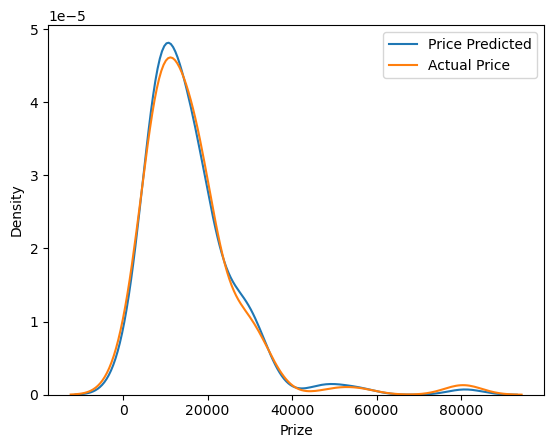

In [1927]:
sns.kdeplot(data=y_pred_gb, label="Price Predicted")
sns.kdeplot(data=y_test, label="Actual Price")
plt.legend()
plt.show()